
## California Housing ML

Predictive ML model for California Housing dataset. Full workflow: data cleaning, EDA, feature engineering, pipelines, model selection (Random Forest, XGBoost), metrics comparison and visualizations. Project built in Jupyter Notebook as part of ML learning path.

W kolejnych ćwiczeniach:
- Wczytamy rzeczywisty zbiór danych (np. ceny nieruchomości).
- Przeprowadzimy EDA: obliczymy statystyki, sprawdzimy brakujące dane, wizualizacje.
- Dopasujemy model regresji liniowej, następnie Ridge i Lasso.
- Zbadamy, jak regularyzacja wpływa na współczynniki i jakość modelu.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
# -------------------------------------
# Wczytanie i eksploracja danych
# -------------------------------------
data = fetch_california_housing()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [3]:
print(type(data))
print(data.keys())
# Rozmiar danych
print("Rozmiar zbioru:", df.shape)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
Rozmiar zbioru: (20640, 9)


In [4]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6031,3.2481,34.0,5.528226,0.989919,1761.0,3.550403,34.08,-117.72,1.28800
18331,6.1575,52.0,7.573333,1.213333,219.0,2.920000,37.45,-122.15,5.00001
1898,1.9851,17.0,5.474950,1.220441,1005.0,2.014028,38.91,-120.01,0.86700
8216,1.9387,30.0,3.655294,1.169412,3543.0,4.168235,33.79,-118.19,1.41700
8044,5.0719,36.0,6.324786,1.045584,1002.0,2.854701,33.84,-118.16,2.19500
6079,6.4667,16.0,6.998464,0.981567,2066.0,3.173579,34.09,-117.85,2.63900
14886,2.2788,28.0,4.792627,0.983871,1266.0,2.917051,32.63,-117.08,1.46300
5810,2.6673,25.0,3.192040,1.105473,2843.0,2.828856,34.13,-118.26,2.18100
19133,2.4117,16.0,4.933657,0.985437,1675.0,2.710356,38.35,-122.72,1.62500
15678,3.6893,52.0,2.953662,1.085202,1045.0,1.562033,37.80,-122.43,4.75000


In [7]:
# Informacje o danych
print("\nInformacje o zbiorze danych:")
df.info()


Informacje o zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
# Statystyki opisowe include='all'/'float64'/'object'
print("\nStatystyki opisowe:")
df.describe(include='all')


Statystyki opisowe:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.describe(include='float64')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
# Braki danych
print("\nBrakujące wartości:")
df.isnull().sum()


Brakujące wartości:


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

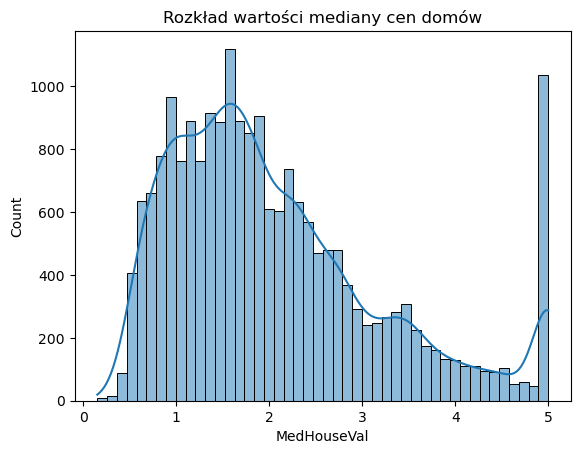

In [11]:
# Wizualizacja rozkładu zmiennej docelowej, czy jest cos niepokojacego?
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Rozkład wartości mediany cen domów")
plt.show()

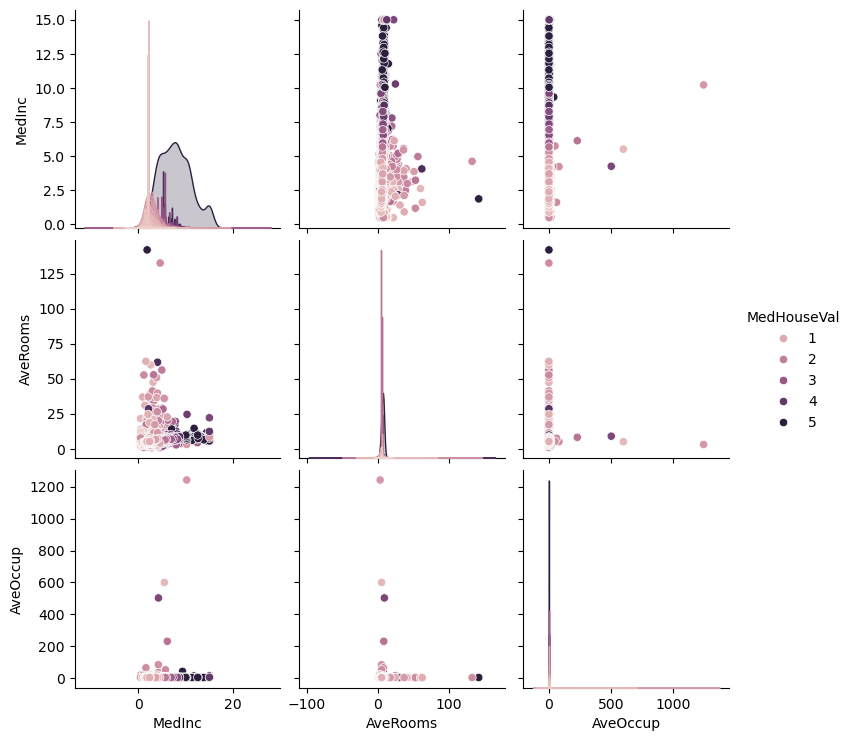

In [12]:
sns.pairplot(df[['MedHouseVal', 'MedInc', 'AveRooms', 'AveOccup']], hue='MedHouseVal')
plt.show()


In [13]:
house_val_counts = df['MedHouseVal'].value_counts()
house_val_counts

MedHouseVal
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
0.34200      1
0.46200      1
3.52000      1
3.07900      1
3.85200      1
Name: count, Length: 3842, dtype: int64

In [14]:
max_value=df['MedHouseVal'].max()

df[df['MedHouseVal']==max_value].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,9.650000e+02
mean,7.825123,33.802073,6.817436,1.097833,1112.808290,2.570442,35.225751,-119.702477,5.000010e+00
std,3.245021,13.027787,4.666195,0.801147,813.321776,1.492767,1.783949,1.946521,8.886390e-16
min,0.499900,2.000000,1.824719,0.500000,13.000000,1.275000,32.680000,-122.640000,5.000010e+00
25%,5.239100,24.000000,5.505593,1.009554,636.000000,2.079710,33.970000,-122.120000,5.000010e+00
50%,7.719700,34.000000,6.884058,1.052227,927.000000,2.518789,34.130000,-118.480000,5.000010e+00
75%,10.112200,44.000000,7.893733,1.102450,1347.000000,2.840580,37.400000,-118.330000,5.000010e+00
max,15.000100,52.000000,141.909091,25.636364,7431.000000,41.214286,38.910000,-116.430000,5.000010e+00


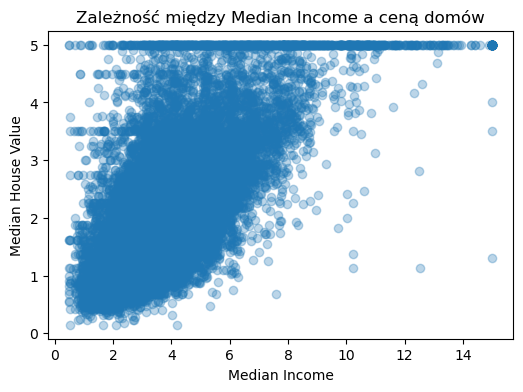

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Zależność między Median Income a ceną domów")
plt.show()

In [16]:
# Check the maximum value in the 'MedHouseVal' column
max_value = df['MedHouseVal'].max()
print(f"Maximum value before removal: {max_value}")


Maximum value before removal: 5.00001


In [17]:
df[df['MedHouseVal'] == max_value]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [18]:

# Remove rows where 'MedHouseVal' is equal to the maximum value
df = df[df['MedHouseVal'] < max_value]


Shape of dataset after removal: (19675, 9)


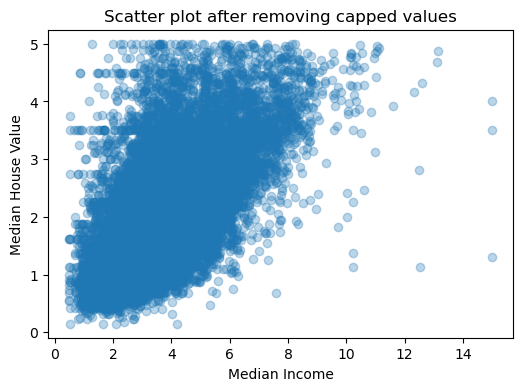

In [19]:

# Verify the changes
print(f"Shape of dataset after removal: {df.shape}")

# Optional: Re-plot the scatter plot to confirm the change
plt.figure(figsize=(6, 4))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Scatter plot after removing capped values")
plt.show()


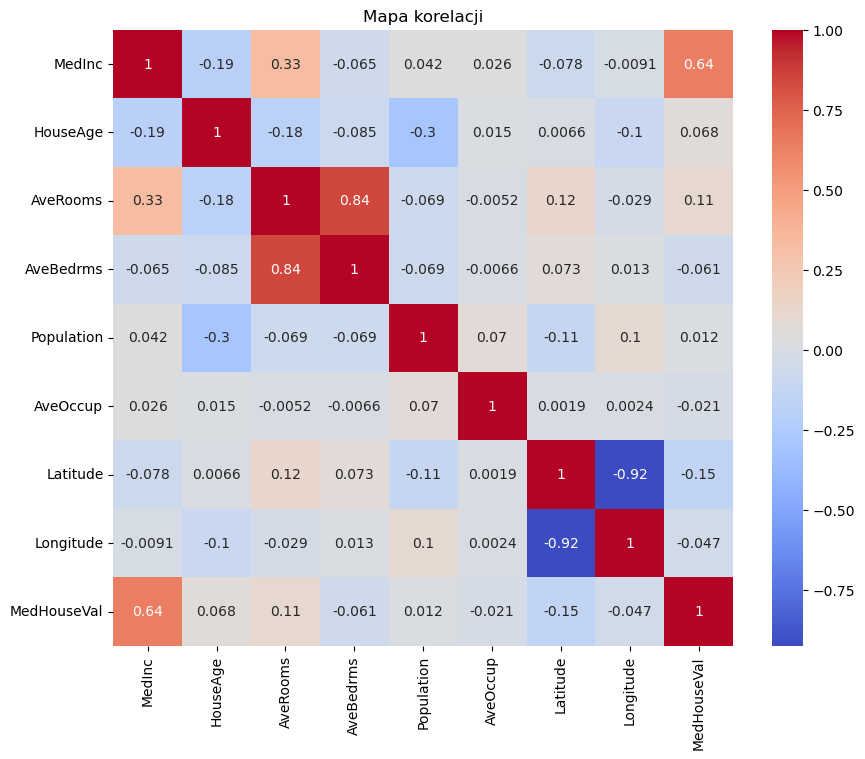

In [20]:

# Mapa korelacji
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa korelacji")
plt.show()

In [21]:
# -------------------------------------
# Przygotowanie danych do modelu
# -------------------------------------
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


In [22]:
from sklearn.model_selection import train_test_split
# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

model_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [24]:
model_lr.fit(X_train, y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [25]:
model_lr.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('regressor', LinearRegression())],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': LinearRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__copy_X': True,
 'regressor__fit_intercept': True,
 'regressor__n_jobs': None,
 'regressor__positive': False,
 'regressor__tol': 1e-06}

In [26]:
y_pred_lr = model_lr.predict(X_test)


In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr  = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [28]:
# Wyświetlenie wyników regresji liniowej
print("Wyniki regresji liniowej:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_lr:", mse_lr)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_lr:", rmse_lr)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_lr:", mae_lr)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_lr:", r2_lr)


Wyniki regresji liniowej:
MSE_lr: 0.4238967681845708
RMSE_lr: 0.6510735505183503
MAE_lr: 0.4898016513229423
R²_lr: 0.5748697510633902


In [29]:
y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr  = model_lr.predict(X_test)

r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr  = r2_score(y_test, y_test_pred_lr)

print(r2_train_lr, r2_test_lr)


0.5687308648274065 0.5748697510633902


In [30]:
# -------------------------------------
# Regularyzacja - Ridge i Lasso
# -------------------------------------
alphas = [0.01, 0.1, 1, 10, 100]
mse_lr_ridge_list = []
r2_lr_ridge_list = []
mse_lr_lasso_list = []
r2_lr_lasso_list = []

In [31]:
from sklearn.linear_model import Ridge, Lasso

for alpha in alphas:
    # Ridge
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred_ridge = ridge_reg.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_lr_ridge_list.append(mse_ridge)
    r2_lr_ridge_list.append(r2_ridge)
    
    # Lasso
    lasso_reg = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_train, y_train)
    y_pred_lasso = lasso_reg.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    mse_lr_lasso_list.append(mse_lasso)
    r2_lr_lasso_list.append(r2_lasso)

In [32]:
ridge_reg.coef_

array([ 4.13788274e-01,  8.33531726e-03, -8.28998254e-02,  4.73127705e-01,
        5.96091902e-06, -3.10166822e-03, -3.77742631e-01, -3.91682610e-01])

In [33]:
results_df = pd.DataFrame({
    'alpha': alphas,
    'MSE_lr_Ridge': mse_lr_ridge_list,
    'R2_lr_Ridge': r2_lr_ridge_list,
    'MSE_lr_Lasso': mse_lr_lasso_list,
    'R2_lr_Lasso': r2_lr_lasso_list
})

print("Wyniki Ridge i Lasso dla różnych alpha:")
display(results_df)

Wyniki Ridge i Lasso dla różnych alpha:


,alpha,MSE_lr_Ridge,R2_lr_Ridge,MSE_lr_Lasso,R2_lr_Lasso
0,0.01,0.423897,0.574870,0.434209,0.564528
1,0.10,0.423898,0.574868,0.509639,0.488878
2,1.00,0.423913,0.574853,0.997269,-0.000171
3,10.00,0.424062,0.574704,0.997259,-0.000160
4,100.00,0.425605,0.573157,0.997304,-0.000206


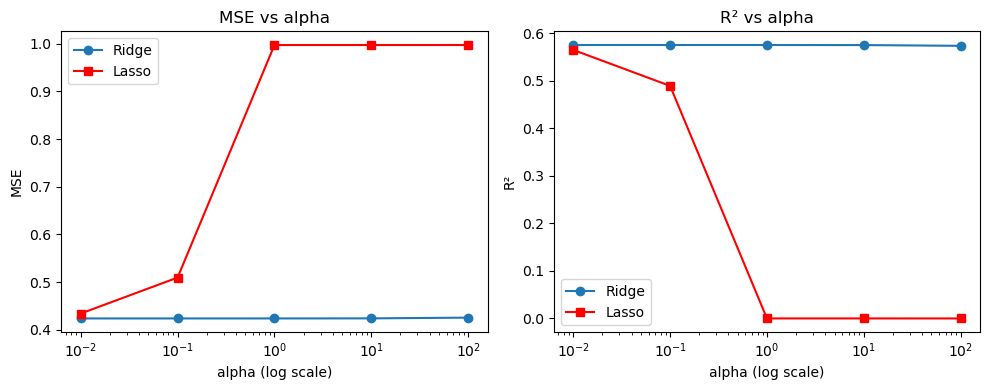

In [34]:

# Wykres MSE i R2 vs alpha
plt.figure(figsize=(10,4))

# MSE
plt.subplot(1,2,1)
plt.plot(alphas, mse_lr_ridge_list, marker='o', label='Ridge')
plt.plot(alphas, mse_lr_lasso_list, marker='s', label='Lasso', color='red')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs alpha')
plt.legend()

# R²
plt.subplot(1,2,2)
plt.plot(alphas, r2_lr_ridge_list, marker='o', label='Ridge')
plt.plot(alphas, r2_lr_lasso_list, marker='s', label='Lasso', color='red')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('R²')
plt.title('R² vs alpha')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
[column for column in df.columns if df[column].dtype=='int64' or df[column].dtype=='float64' ]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

In [36]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [37]:

# Podgląd współczynników Lasso dla różnych alpha
coefs_lasso = []
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_train, y_train)
    coefs_lasso.append(lasso_reg.coef_)
coefs_lasso = np.array(coefs_lasso)

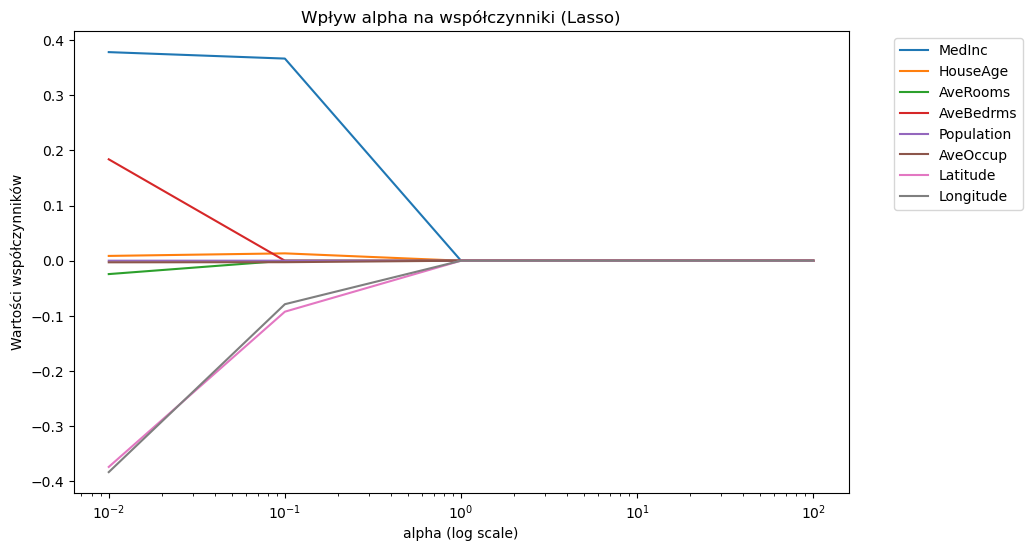

In [38]:

plt.figure(figsize=(10,6))
for i, col in enumerate(X.columns):
    plt.plot(alphas, coefs_lasso[:, i], label=col)
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('Wartości współczynników')
plt.title('Wpływ alpha na współczynniki (Lasso)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()   

In [39]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(
    max_depth=7,
    random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

In [40]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt  = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [41]:
# Wyświetlenie wyników regresji liniowej
print("Wyniki Decision Tree:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_dt:", mse_dt)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_dt:", rmse_dt)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_dt:", mae_dt)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_dt:", r2_dt)

Wyniki Decision Tree:
MSE_dt: 0.3838855493622458
RMSE_dt: 0.6195849815499451
MAE_dt: 0.44198947412083966
R²_dt: 0.6149973969783169


In [42]:
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt  = model_dt.predict(X_test)

r2_train_dt = r2_score(y_train, y_train_pred_dt)
r2_test_dt  = r2_score(y_test, y_test_pred_dt)

print(r2_train_dt, r2_test_dt)


0.6770770602900941 0.6149973969783169


In [43]:
depths = [2, 3, 4, 5, 6, 7, 8, 10, None]  # None = drzewo bez ograniczeń
results = []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test  = r2_score(y_test, model.predict(X_test))

    results.append((d, r2_train, r2_test))

results

[(2, 0.3874076909972456, 0.38174466179324185),
 (3, 0.4771685734506175, 0.4711246452852189),
 (4, 0.5279681731595758, 0.5040297640921774),
 (5, 0.5793903310337944, 0.5507972025484315),
 (6, 0.6278242275934329, 0.5776737374670462),
 (7, 0.6770770602900941, 0.6149973969783169),
 (8, 0.7332893654078947, 0.647919494106797),
 (10, 0.8198570724129927, 0.6517115285610176),
 (None, 1.0, 0.5535038661061455)]

In [44]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ))
])

In [45]:
model_rf.fit(X_train, y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [46]:
pred_rf = model_rf.predict(X_test)

In [47]:
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf  = mean_absolute_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

In [48]:
# Wyświetlenie wyników lasów losowych
print("Wyniki Random Forest:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_rf:", mse_rf)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_rf:", rmse_rf)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_rf:", mae_rf)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_rf:", r2_rf)

Wyniki Random Forest:
MSE_rf: 0.22340222758889386
RMSE_rf: 0.47265444839638804
MAE_rf: 0.31466488866581954
R²_rf: 0.7759477029404809


In [49]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'regressor__n_estimators': [400, 500, 600],
    'regressor__max_depth': [12, 15, 18],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4, 8],
    'regressor__max_features': ['sqrt', 'log2']
}

In [50]:
model_rf_gs = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

In [51]:
model_rf_gs.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'regressor__max_depth': [12, 15, ...], 'regressor__max_features': ['sqrt', 'log2'], 'regressor__min_samples_leaf': [1, 2, ...], 'regressor__min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [52]:
best_model_rf_gs = model_rf_gs.best_params_
best_model_rf_gs

{'regressor__n_estimators': 600,
 'regressor__min_samples_split': 2,
 'regressor__min_samples_leaf': 1,
 'regressor__max_features': 'log2',
 'regressor__max_depth': 18}

In [53]:
y_pred_rf_gs = model_rf_gs.predict(X_test)

In [54]:
best_estimator = model_rf_gs.best_estimator_
best_estimator

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,600
,criterion,'squared_error'
,max_depth,18
,min_samples_split,2


In [55]:
mse_rf_gs = mean_squared_error(y_test, y_pred_rf_gs)
rmse_rf_gs = np.sqrt(mse_rf_gs)
mae_rf_gs  = mean_absolute_error(y_test, y_pred_rf_gs)
r2_rf_gs = r2_score(y_test, y_pred_rf_gs)

In [56]:
# Wyświetlenie wyników lasów losowych po optymalizacji hiperparametrów
print("Wyniki Random Forest GS:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_rf:", mse_rf_gs)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_rf:", rmse_rf_gs)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_rf:", mae_rf_gs)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_rf:", r2_rf_gs)

Wyniki Random Forest GS:
MSE_rf: 0.21169221611761924
RMSE_rf: 0.460100223992142
MAE_rf: 0.31101283444121086
R²_rf: 0.7876917889196076


In [57]:
features = X_train.columns
features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [58]:
importances =best_estimator.named_steps['regressor'].feature_importances_
importances

array([0.36047236, 0.05341659, 0.09243734, 0.04253087, 0.03494584,
       0.12403856, 0.14627138, 0.14588705])

In [59]:
for i, j in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(i, j)

MedInc 0.36047236303364766
Latitude 0.14627138082172272
Longitude 0.14588705397769042
AveOccup 0.12403855804046322
AveRooms 0.09243733596013304
HouseAge 0.053416591196163536
AveBedrms 0.04253087492410161
Population 0.03494584204607786


In [60]:
if_ = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)


In [61]:
if_

,feature,importance
0,MedInc,0.360472
6,Latitude,0.146271
7,Longitude,0.145887
5,AveOccup,0.124039
2,AveRooms,0.092437
1,HouseAge,0.053417
3,AveBedrms,0.042531
4,Population,0.034946


In [62]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
        n_estimators=500,
        max_depth=7,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
)

In [63]:
pipe_xgb = Pipeline(steps=[
    ("regressor", model_xgb)
])

In [64]:
pipe_xgb.fit(X_train, y_train)

,steps,"[('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


In [65]:
y_pred_xgb = pipe_xgb.predict(X_test)

In [66]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb  = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [67]:
# Wyświetlenie wyników lasów losowych po optymalizacji hiperparametrów
print("Wyniki XGBoost:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_xgb:", mse_xgb)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_xgb:", rmse_xgb)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_xgb:", mae_xgb)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_xgb:", r2_xgb)

Wyniki XGBoost:
MSE_xgb: 0.17670578738230916
RMSE_xgb: 0.4203638749729919
MAE_xgb: 0.27638663270307345
R²_xgb: 0.822780023305884


In [68]:
# Słownik z parametrami, które RandomizedSearchCV ma losować i testować
param_grid = {
    # max_depth – maksymalna głębokość drzew w XGBoost (im większa, tym bardziej skomplikowane drzewa)
    # "regressor__" = odwołanie do kroku "regressor" w Pipeline (czyli naszego XGBRegressora)
    "regressor__max_depth": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],

    # learning_rate – jak duży krok robi każde kolejne drzewo w boostingu
    # mniejsze wartości = wolniejsze, ale zwykle bezpieczniejsze uczenie (mniejsze ryzyko przeuczenia)
    "regressor__learning_rate": [0.01, 0.02, 0.03, 0.05, 0.07],

    # n_estimators – ile drzew zbuduje XGBoost (więcej drzew = mocniejszy model, ale wolniejszy)
    "regressor__n_estimators": [600, 700, 800, 900, 1000],

    # subsample – jaki procent PRÓBEK (wierszy) używać do trenowania każdego drzewa
    # np. 0.8 = każde drzewo trenuje się na losowych 80% danych, co pomaga zmniejszyć przeuczenie
    "regressor__subsample": [0.6, 0.8, 1.0],

    # colsample_bytree – jaki procent CECH (kolumn) używać przy budowie każdego drzewa
    # np. 0.8 = każde drzewo widzi tylko 80% losowo wybranych cech
    "regressor__colsample_bytree": [0.6, 0.8, 0.9, 1.0],

    # gamma – minimalny „zysk” z nowego podziału w drzewie, żeby ten podział został wykonany
    # większe gamma = mniej podziałów, prostsze drzewa (mocniejsza regularyzacja)
    "regressor__gamma": [0, 1, 5]
}


In [69]:
model_xgb_rs = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [70]:
model_xgb_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'regressor__colsample_bytree': [0.6, 0.8, ...], 'regressor__gamma': [0, 1, ...], 'regressor__learning_rate': [0.01, 0.02, ...], 'regressor__max_depth': [3, 4, ...], ...}"
,n_iter,20
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [71]:
best_params_xgb_rs = model_xgb_rs.best_params_
best_params_xgb_rs

{'regressor__subsample': 0.8,
 'regressor__n_estimators': 900,
 'regressor__max_depth': 7,
 'regressor__learning_rate': 0.05,
 'regressor__gamma': 0,
 'regressor__colsample_bytree': 1.0}

In [72]:
best_estimator_xgb_rs = model_xgb_rs.best_estimator_
best_estimator_xgb_rs

,steps,"[('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0


In [73]:
y_pred_xgb_rs = best_estimator_xgb_rs.predict(X_test)


In [74]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb_rs)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb  = mean_absolute_error(y_test, y_pred_xgb_rs)
r2_xgb = r2_score(y_test, y_pred_xgb_rs)

In [75]:
# Wyświetlenie wyników XGBoost po optymalizacji hiperparametrów
print("Wyniki XGBoost po Randomized Search:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_xgb:", mse_xgb)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_xgb:", rmse_xgb)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_xgb:", mae_xgb)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_xgb:", r2_xgb)

Wyniki XGBoost po Randomized Search:
MSE_xgb: 0.16978748521166498
RMSE_xgb: 0.41205276993567824
MAE_xgb: 0.2715572124112868
R²_xgb: 0.8297184567754783


In [76]:
importances_xgb_rs = best_estimator_xgb_rs.named_steps['regressor'].feature_importances_
importances_xgb_rs

array([0.3554291 , 0.06802425, 0.05517614, 0.03515425, 0.03668929,
       0.13993183, 0.14697123, 0.16262394], dtype=float32)

In [77]:
if_xgb = pd.DataFrame({
    'feature': features,
    'importance': importances_xgb_rs
}).sort_values(by='importance', ascending=False)

In [78]:
if_xgb

,feature,importance
0,MedInc,0.355429
7,Longitude,0.162624
6,Latitude,0.146971
5,AveOccup,0.139932
1,HouseAge,0.068024
2,AveRooms,0.055176
4,Population,0.036689
3,AveBedrms,0.035154
